# Numeric Model

## Environment

In [1]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns
import seaborn as sns
sns.set(rc={"figure.figsize":(25, 15)})
sns.set_style("whitegrid")

pd.set_option('display.max_columns', None)

pd.set_option('display.float_format', '{:.6g}'.format)

import statsmodels.api as sm
from scipy import stats
from scipy.stats import t

from sklearn.feature_selection import f_regression
from sklearn.feature_selection import chi2

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.inspection import permutation_importance

## Numeric Model + FE Bool

**Numeric MODEL:**
    
    - Dataset: DF Numeric + FE Bool
    - Train Test Split 80/20
    - Linear Regression - sklearn
    - Métricas: MAE, RMSE, R2

### Dataset (DF Numeric FE No Reviews)

In [2]:
df = pd.read_csv("data/airbnb-numeric-noReviews.csv")

In [3]:
df.columns

Index(['Latitude', 'Longitude', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Guests Included', 'Extra People', 'Minimum Nights',
       'Availability 30', 'Availability 365', 'Security Deposit',
       'Cleaning Fee', 'Calculated host listings count',
       'Num_Host_Verifications', 'Name_Len', 'Summary_Len', 'Space_Len',
       'Description_Len', 'Summary_Lang', 'is_Thumbnail', 'is_HostAbout',
       'is_ResponseInHours', 'is_EntireHome', 'is_Bed', 'is_UpdatedToday',
       'Price'],
      dtype='object')

In [4]:
selected_cols = ['Latitude', 'Longitude', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Guests Included', 'Extra People', 'Minimum Nights',
       'Availability 30', 'Availability 365', 'Security Deposit',
       'Cleaning Fee', 'Calculated host listings count',
       'Num_Host_Verifications', 'Name_Len', 'Summary_Len', 'Space_Len',
       'Description_Len', 'Summary_Lang', 'is_Thumbnail', 'is_HostAbout',
       'is_ResponseInHours', 'is_EntireHome', 'is_Bed', 'is_UpdatedToday',
       'Price']

In [5]:
df = df[selected_cols]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13115 entries, 0 to 13114
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Latitude                        13115 non-null  float64
 1   Longitude                       13115 non-null  float64
 2   Accommodates                    13115 non-null  int64  
 3   Bathrooms                       13115 non-null  float64
 4   Bedrooms                        13115 non-null  float64
 5   Beds                            13115 non-null  float64
 6   Guests Included                 13115 non-null  int64  
 7   Extra People                    13115 non-null  int64  
 8   Minimum Nights                  13115 non-null  int64  
 9   Availability 30                 13115 non-null  int64  
 10  Availability 365                13115 non-null  int64  
 11  Security Deposit                13115 non-null  float64
 12  Cleaning Fee                    

In [7]:
df.shape

(13115, 27)

In [8]:
df.isnull().sum().sum()

0

Hay 13.115 filas, 27 columnas y 0 NaN

### Train Test Split

In [9]:
target = 'Price'
X = df.drop(target, axis=1)
y = df[target]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [11]:
y_train.describe()

count     10492
mean    66.2981
std     56.6682
min           9
25%          31
50%          53
75%          80
max         875
Name: Price, dtype: float64

In [12]:
y_test.describe()

count      2623
mean    64.5177
std     53.2405
min          10
25%          31
50%          50
75%          80
max         850
Name: Price, dtype: float64

In [13]:
y.describe()

count     13115
mean    65.9421
std      56.002
min           9
25%          31
50%          52
75%          80
max         875
Name: Price, dtype: float64

### Sklearn Linear Regression

In [14]:
model = LinearRegression()

In [15]:
model.fit(X_train, y_train)

LinearRegression()

In [16]:
X_pred = model.predict(X_train)

In [17]:
y_pred = model.predict(X_test)

### Results

In [18]:
train= ['Train Numeric FE',
            round(mean_absolute_error(y_train, X_pred),2),
            round(mean_squared_error(y_train, X_pred, squared=False),2),
            round(r2_score(y_train, X_pred),3)]

test = ['Test Numeric FE',
           round(mean_absolute_error(y_test, y_pred),2),
           round(mean_squared_error(y_test, y_pred, squared=False),2),
           round(r2_score(y_test, y_pred),3)]

results = pd.DataFrame([train, test])
results.columns=['Model','MAE', 'RMSE','R2']

In [19]:
results

,Model,MAE,RMSE,R2
0,Train Numeric FE,21.91,39.31,0.519
1,Test Numeric FE,20.83,35.69,0.551


### Residuals

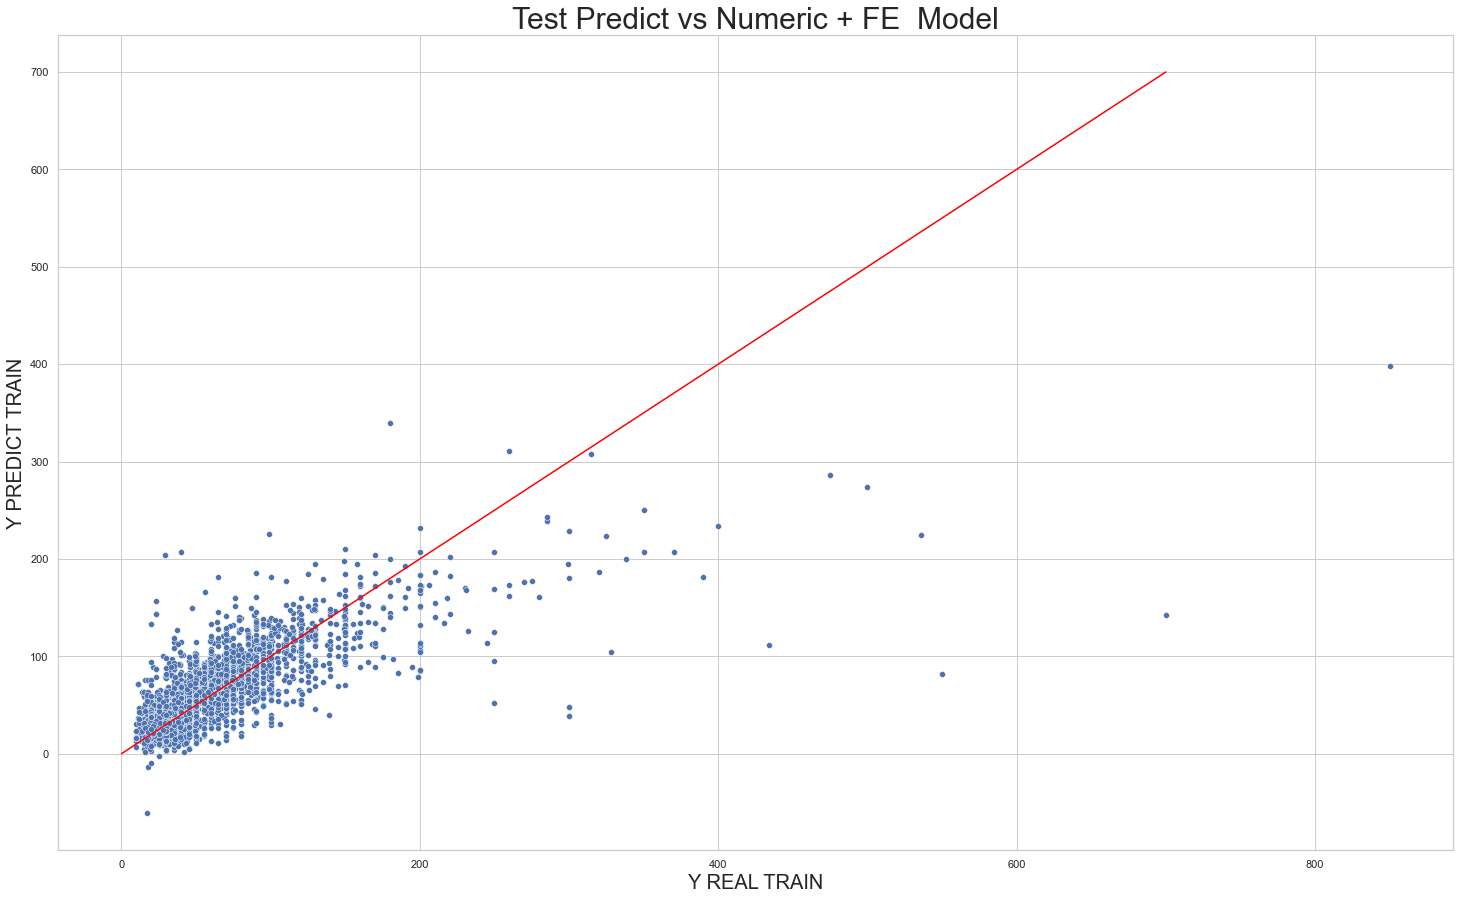

In [20]:
sns.scatterplot(y=y_pred, x=y_test)
sns.lineplot(x=[0,700], y=[0,700], color='red')
plt.title("Test Predict vs Numeric + FE  Model", size=30)
plt.xlabel('Y REAL TRAIN', size=20)
plt.ylabel('Y PREDICT TRAIN', size=20)
plt.show()

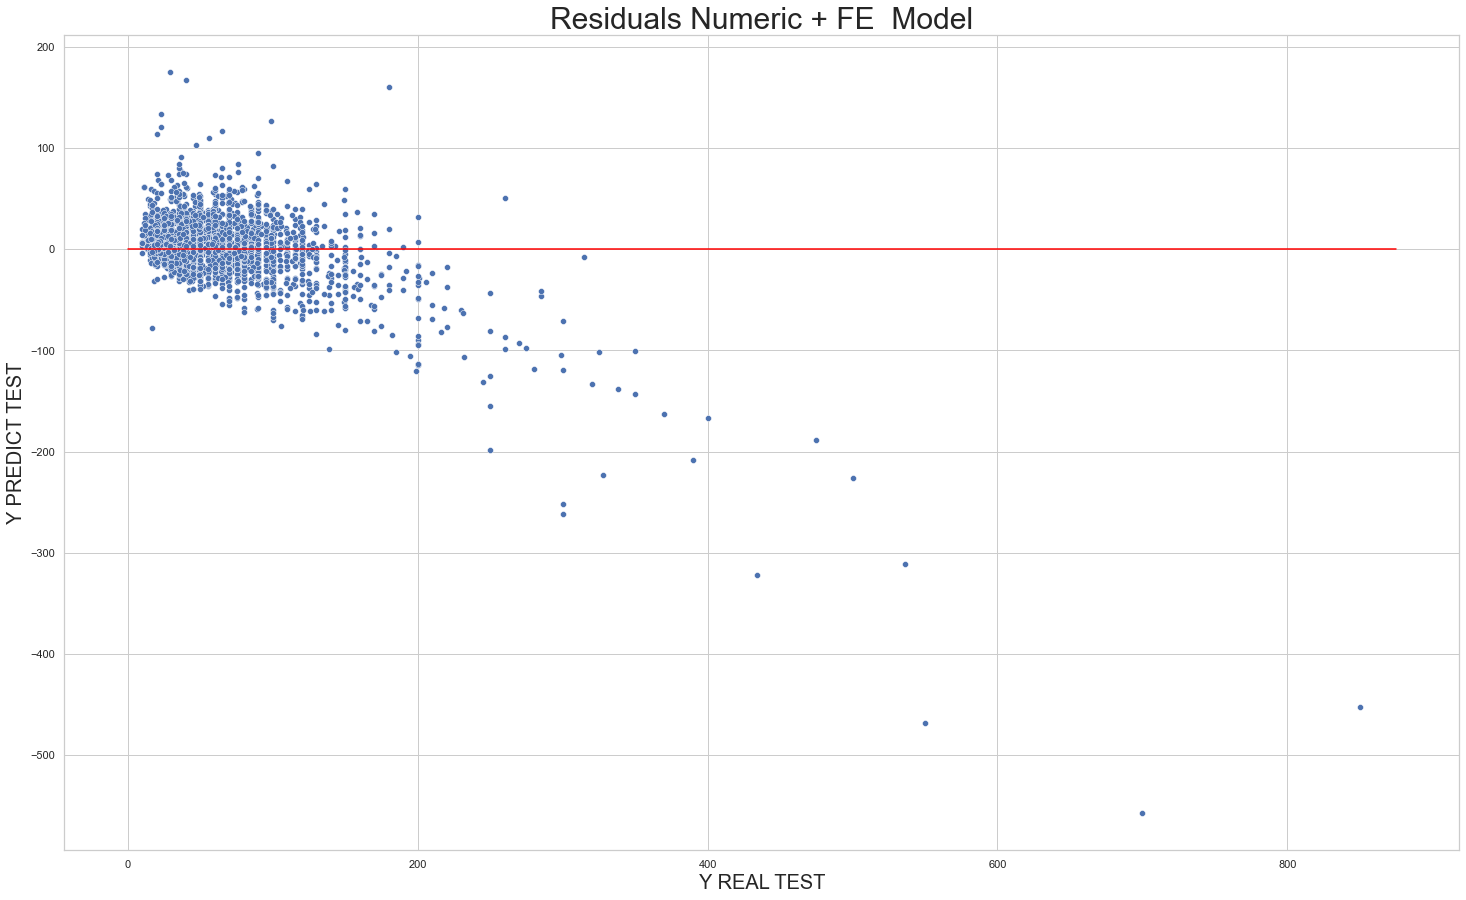

In [21]:
diff = y_pred - y_test
sns.scatterplot(y=diff, x=y_test)
sns.lineplot(x=[0,875], y=[0,0], color='red')
plt.title("Residuals Numeric + FE  Model", size=30)
plt.xlabel('Y REAL TEST', size=20)
plt.ylabel('Y PREDICT TEST', size=20)
plt.show()

HAy más dificultad en predecir los precios altos

### Permutarion Importance

In [22]:
perm_importance = permutation_importance(model, X, y, n_repeats=5,random_state=42)

In [23]:
sorted_idx = perm_importance.importances_mean.argsort()

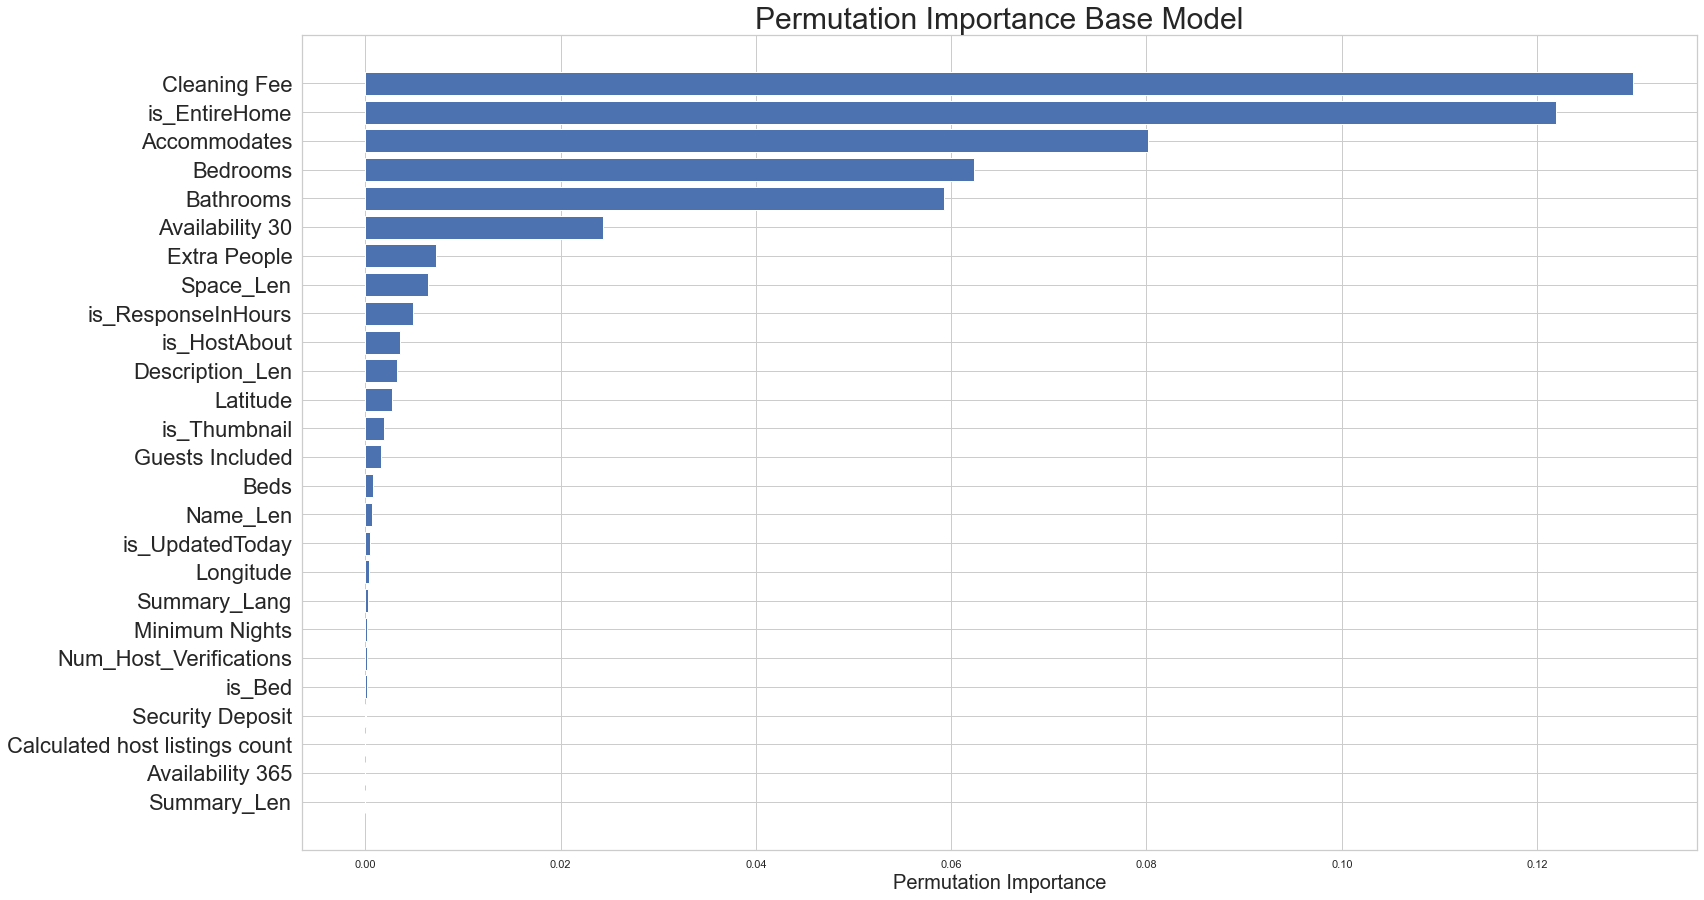

In [24]:
plt.barh(X.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance", size=20)
plt.title('Permutation Importance Base Model', size= 30)
plt.yticks(size=22)
plt.show()